## Import libraries

In [2]:
# Import some required libraries. Some libraries will be imported later if needed.
import numpy as np 
import pandas as pd 
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os

## load dataset

In [3]:
from sklearn.datasets import load_files
training_directory = r'C:/Users/polit/OneDrive/Desktop/fruits-360/mixed'

def load_images(image_path):
    data = load_files(image_path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_images(training_directory)


print('Successfully loaded !')
print('Number of training images : ' , x_train.shape[0])


Successfully loaded !
Number of training images :  12694


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

## check no of classes

In [5]:
no_of_classes = len(np.unique(y_train))
no_of_classes

19

## Convert class vector (integers from 0 to nb_classes) to binary class matrix

In [6]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test= np_utils.to_categorical(y_test,no_of_classes)

## number of test data

In [7]:
x_train.shape,y_train.shape

((10155,), (10155, 19))

In [8]:
x_test.shape,y_test.shape

((2539,), (2539, 19))

 ## convert images to numpy array

In [9]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Shape of Training set: ',x_train.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Shape of Test set : ',x_test.shape)

print('Shape of one training image ',x_train[0].shape)

Shape of Training set:  (10155, 100, 100, 3)
Shape of Test set :  (2539, 100, 100, 3)
Shape of one training image  (100, 100, 3)


## Scale features  between 0.0 and 1.0.

In [9]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout,Activation,BatchNormalization,MaxPool2D
from keras.optimizers import Adamax, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras import backend as K
from tensorflow.keras.optimizers import Adadelta
from keras.regularizers import l2
model = Sequential()

model.add(Conv2D(filters = 16, strides=(1, 1),kernel_size = (3,3),input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(19,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        1

In [11]:
# optimizer=Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy', tf.keras.metrics.Precision()])

learned_weights = ModelCheckpoint(filepath = 'C:/Users/polit/OneDrive/Desktop/fruits-360/fruits_360_weights_multiple_mix.hdf5', verbose = 2, save_best_only = True)


history = model.fit(x_train,y_train,
        batch_size = 20,
        epochs=10,
        validation_split=0.2,           
        callbacks = [learned_weights],
        verbose=2, shuffle=True)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.52313, saving model to C:/Users/polit/OneDrive/Desktop/fruits-360\fruits_360_weights_multiple_mix.hdf5
407/407 - 115s - loss: 0.4243 - accuracy: 0.8869 - precision: 0.9548 - val_loss: 0.5231 - val_accuracy: 0.9838 - val_precision: 1.0000
Epoch 2/10

Epoch 00002: val_loss improved from 0.52313 to 0.02460, saving model to C:/Users/polit/OneDrive/Desktop/fruits-360\fruits_360_weights_multiple_mix.hdf5
407/407 - 77s - loss: 0.0593 - accuracy: 0.9849 - precision: 0.9901 - val_loss: 0.0246 - val_accuracy: 0.9911 - val_precision: 0.9950
Epoch 3/10

Epoch 00003: val_loss improved from 0.02460 to 0.02191, saving model to C:/Users/polit/OneDrive/Desktop/fruits-360\fruits_360_weights_multiple_mix.hdf5
407/407 - 137s - loss: 0.0320 - accuracy: 0.9903 - precision: 0.9927 - val_loss: 0.0219 - val_accuracy: 0.9951 - val_precision: 0.9955
Epoch 4/10

Epoch 00004: val_loss improved from 0.02191 to 0.01426, saving model to C:/Users/polit/OneDrive/

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
model = load_model('C:/Users/polit/OneDrive/Desktop/fruits-360/fruits_360_weights_multiple_mix.hdf5')

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)

# score contains the metrics passed in the compile method. Here: loss, accuracy, and precision
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'precision']
[0.007081147748976946, 0.9976368546485901, 0.9976368546485901]


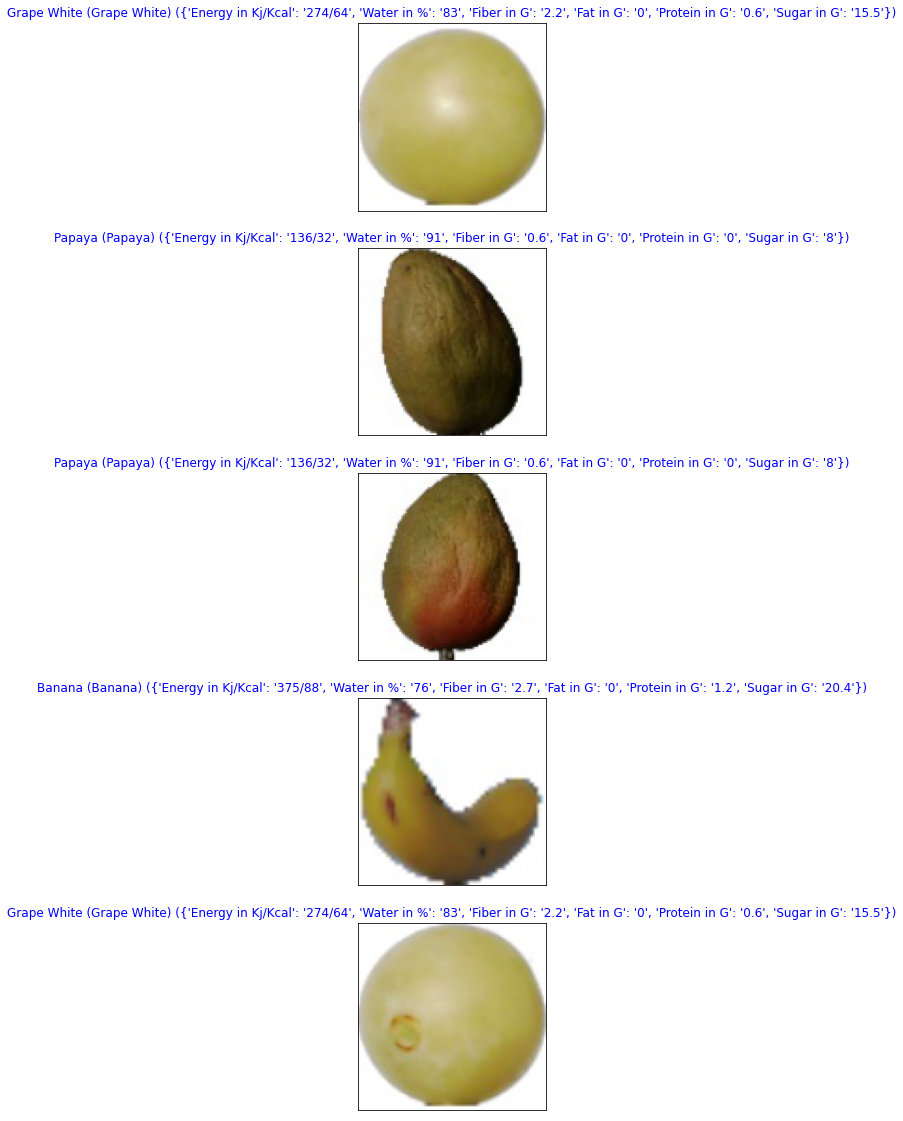

In [14]:
import csv
         
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(20, 20))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=5, replace=False)):
    ax = fig.add_subplot(5, 1, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    
    x = target_labels[pred_idx]
    with open("nutrition.csv") as f:
        reader = csv.reader(f)
        for row in reader:
            if x in row[0]:
                nutrition_value = (row)
    val = {}
    val["Energy in Kj/Kcal"] = nutrition_value[1]
    val["Water in %"] = nutrition_value[2]
    val["Fiber in G"] = nutrition_value[3]
    val["Fat in G"] = nutrition_value[4]
    val["Protein in G"] = nutrition_value[5]
    val["Sugar in G"] = nutrition_value[6]
            
    if target_labels[pred_idx] != target_labels[true_idx]:
        val = "Prediction not correct"
    
    ax.set_title("{} ({}) ({})".format(target_labels[pred_idx], target_labels[true_idx] ,val ),
                 color=("blue" if pred_idx == true_idx else "red"))
    
    


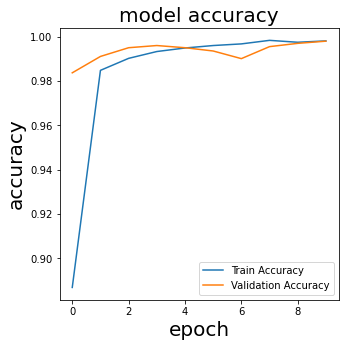

In [15]:
import matplotlib.pyplot as plt 
#plt.figure(1)  
fig = plt.figure(figsize=(5,5))   
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title('model accuracy',fontsize=20)  
plt.ylabel('accuracy',fontsize=20)  
plt.xlabel('epoch',fontsize=20)   
plt.legend()
plt.show()


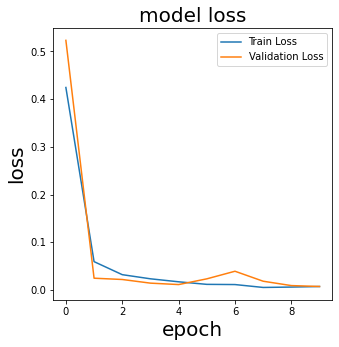

In [16]:
#plt.subplot(212)  
fig = plt.figure(figsize=(5,5)) 
plt.plot(history.history['loss'],label = "Train Loss")  
plt.plot(history.history['val_loss'],label = "Validation Loss")  
plt.title('model loss',fontsize=20)  
plt.ylabel('loss',fontsize=20)  
plt.xlabel('epoch',fontsize=20)   
plt.legend()
plt.show()

In [17]:
import numpy as np

prob = model.predict(x_test)
pred = np.argmax(prob, axis = 1)
label = np.argmax(y_test,axis = 1) 

correct_indices = np.flatnonzero(pred == label) 
incorrect_indices = np.flatnonzero(pred != label) 
print(len(correct_indices)," classified correctly") 
print(len(incorrect_indices)," classified incorrectly")


2533  classified correctly
6  classified incorrectly


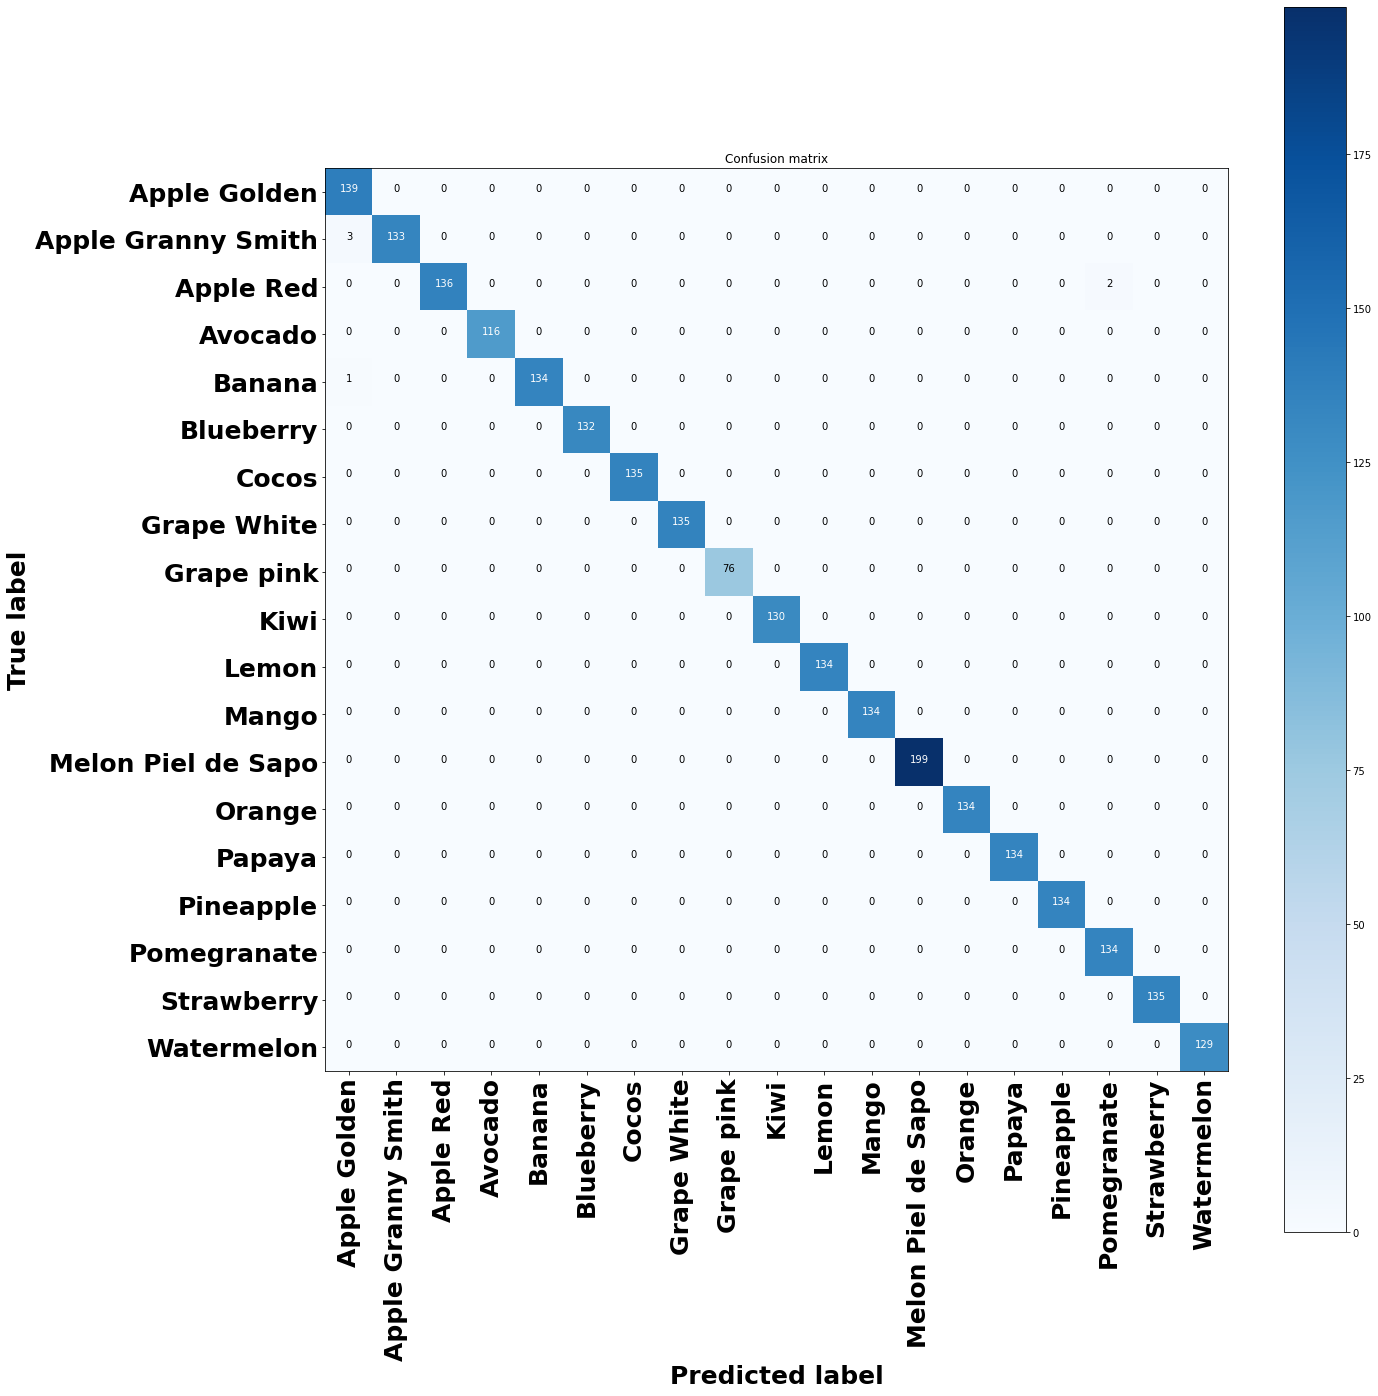

In [18]:
import itertools
fig = plt.figure(figsize=(20, 20))
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,rotation=90, fontsize=25, weight = 'bold')
    plt.yticks(tick_marks, classes,fontsize=25, weight = 'bold')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=25, weight = 'bold')
    plt.xlabel('Predicted label',fontsize=25, weight = 'bold')

conf_mat = tf.math.confusion_matrix(labels=label, predictions=pred).numpy()
plot_confusion_matrix(conf_mat, target_labels)

In [24]:
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(20, 20))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    #ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    
    if target_labels[pred_idx] != target_labels[true_idx]:
        ax = fig.add_subplot(10, 1, i + 1, xticks=[], yticks=[])
        
        ax.imshow(np.squeeze(x_test[idx]))
    
        
        #x = target_labels[pred_idx]
        ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx] ),
                 color=("red"))
   
    
    


<Figure size 1440x1440 with 0 Axes>